## Logistic Regression

Using LR to classify the survival rate of titanic survivors based on their features.

The kaggle dataset for titanic is already divided into a test and train csv files.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [16]:
train = pd.read_csv('../../../../data/train.csv')

In [17]:
train.head(1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Cleaning our data using a heatmap




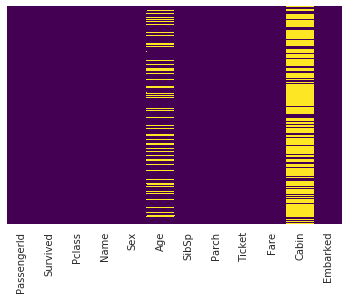

In [19]:
sns.heatmap(train.isnull(),yticklabels = False,cbar=False,cmap='viridis')

From our heatmap, we can see that we're missing a lot information on age and a ton on Cabin. We most likely will not use those features for sheer number of null values present.

Let's see our target data's survival ratio. We will use a countplot to do this and add the paramter $hue='sex'$ to further separate the data.

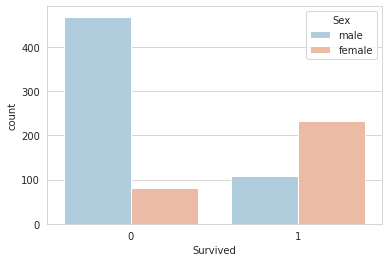

In [25]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

Based on the above plot, we can see that females were least likely to die during the titanic. We'll see this value impact our coeff stage later when we start doing our modeling for LR.

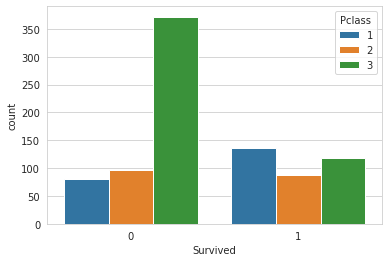

In [27]:
sns.countplot(x='Survived', data=train, hue='Pclass')

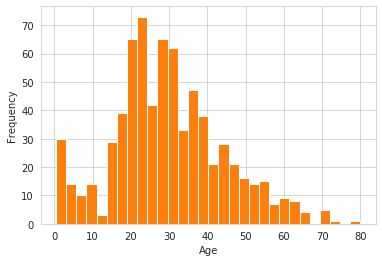

In [31]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

train['Age'].plot.hist(bins=30)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [46]:
# import cufflinks as cf
# cf.go_offline()
# train['Fare'].iplot(kind='hist', bins=30)

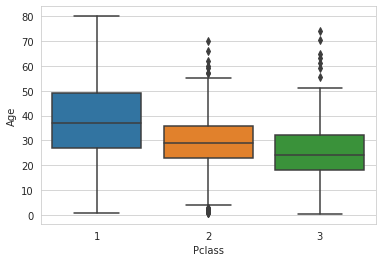

In [47]:
sns.boxplot(x='Pclass', y='Age', data=train)